In [1754]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## I.apprentisage

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

# KMeans

* Every greyscale image is matrix of size (x,y)
* Flattening : Flatten the matrix to 1D vector
* Matrix of size 8 8 , flattened matrix will be single vector of size 64 (2nd row will be appended to 1st row i.e every consective row of 8 8  matrix will be appended to previous row forming a 1D vector of length 64)

In [1755]:
df_train = pd.read_csv('optical+recognition+of+handwritten+digits/optdigits.tra', sep = ',', header=None)
df_test = pd.read_csv('optical+recognition+of+handwritten+digits/optdigits.tes', sep = ',', header=None)

In [1756]:
def data_prep(df):
    X = df.drop([64], axis = 'columns')
    Y = df[64]
    return X, Y

def count_same_elem(a_list, b_list):
    res = 0
    for i in range(len(a_list)):
        if a_list[i] == b_list[i]:
            res += 1
    return res

In [1757]:
X_train, Y_train = data_prep(df_train)
X_test, Y_test = data_prep(df_test)

In [1758]:
X_train = X_train**2
X_test = X_test**2

In [1759]:
def plot_PCA(X):
    from sklearn.decomposition import PCA 
    pca = PCA(2) 
    reduced_data = pca.fit_transform(X) 
    df_reduced = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
    # Plot the reduced data
    plt.figure(figsize=(7, 5))
    plt.scatter(df_reduced['PC1'], df_reduced['PC2'], alpha=0.7, edgecolors='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('2D PCA of the train dataset')
    plt.show()

def fit_kmeans(X, nb_cluster):
    kmeans = KMeans(n_clusters = nb_cluster, init = "k-means++", random_state=0).fit(X)
    print("Number of iterations:", kmeans.n_iter_)
    print("Cluster:", kmeans.labels_)
    print("Within-cluster sum of squares:", kmeans.inertia_)
    return kmeans

def visualize_data_points(X, nb_cluster):
    from sklearn.decomposition import PCA 

    # Reducing the dataset 
    pca = PCA(2) 
    reduced_data = pca.fit_transform(X) 
    k_means = fit_kmeans(reduced_data, nb_cluster) 
    
    # Calculating the centroids 
    centroids = k_means.cluster_centers_ 
    # label = k_means.predict(reduced_data) 
    label = k_means.labels_
    unique_labels = np.unique(label) 
    
    # plotting the clusters: 
    plt.figure(figsize=(9, 7)) 
    for i in unique_labels: 
        plt.scatter(reduced_data[label == i, 0], 
                    reduced_data[label == i, 1], 
                    label=i) 
    plt.scatter(centroids[:, 0], centroids[:, 1], 
                marker='x', s=169, linewidths=3, 
                color='k', zorder=10) 
    plt.legend() 
    plt.title("2D representation of clustering")
    plt.show() 

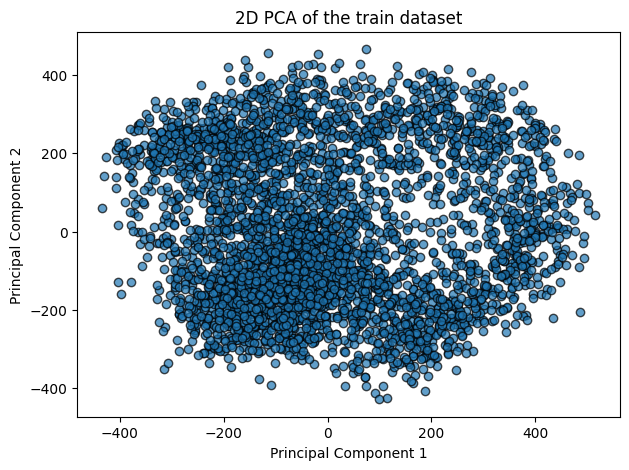

In [1760]:
plot_PCA(X_train)

Number of iterations: 18
Cluster: [6 6 9 ... 2 2 9]
Within-cluster sum of squares: 30991740.476125542


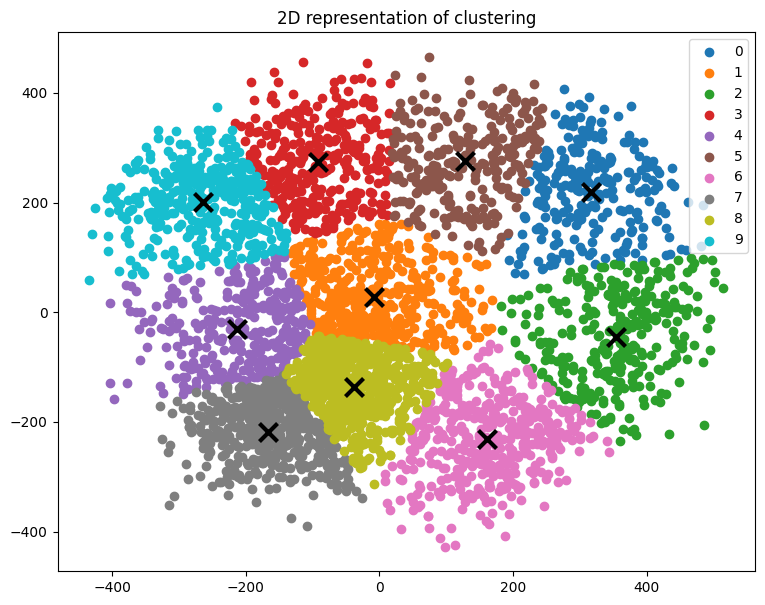

In [1761]:
K = 10
kmeans = visualize_data_points(X_train, K)

# I. Apprentissage

## 1. Faire un K-moyennes avec K=10 sur la base d’apprentissage (BA) :

In [1762]:
kmeans

In [1763]:
K = 10
kmeans = fit_kmeans(X_train, K)
#lowest SSE value (Sum of squared distances of samples to their closest cluster center)
# within-cluster sum of squares

Number of iterations: 16
Cluster: [9 9 4 ... 5 5 4]
Within-cluster sum of squares: 699015062.0052077


In [1764]:
kmeans.cluster_centers_

array([[ 0.00000000e+00,  3.07692308e-03,  8.33846154e-01,
         4.11261538e+01,  1.64000000e+02,  2.80461538e+01,
         5.17846154e+00,  8.76923077e-01,  0.00000000e+00,
         6.15384615e-02,  9.23384615e+00,  1.58763077e+02,
         1.27975385e+02,  1.91815385e+01,  2.19876923e+01,
         2.67692308e+00,  1.73472348e-18,  6.49230769e-01,
         7.91107692e+01,  1.73812308e+02,  3.60861538e+01,
         5.87230769e+01,  5.09323077e+01,  1.16923077e+00,
        -4.33680869e-19,  1.93230769e+01,  1.85276923e+02,
         9.47661538e+01,  3.90338462e+01,  1.52950769e+02,
         6.25630769e+01,  4.00000000e-02,  1.53846154e-02,
         6.75107692e+01,  2.27544615e+02,  1.28523077e+02,
         1.51458462e+02,  2.25907692e+02,  3.71692308e+01,
         0.00000000e+00,  1.18461538e+00,  7.89723077e+01,
         1.58436923e+02,  1.52301538e+02,  2.25766154e+02,
         1.72864615e+02,  9.62461538e+00,  1.38777878e-17,
         7.78461538e-01,  1.98830769e+01,  3.83784615e+0

A lower inertia value indicates that the clusters are more compact and the data points within each cluster are closer to their respective cluster centers

Lower values of inertia generally indicate better clustering, as it suggests that the clusters are tighter and more well-defined.


## 2. Par cluster: faire un histogramme du nombre de chiffres de chaque classe

In [1765]:
def nb_elem_each_cluster(res_cluster):
    res_cluster = list(res_cluster)
    cluster_ = list(np.unique(res_cluster))
    digit_count = []
    for i in cluster_: 
        digit_count.append(res_cluster.count(i))
    print("List of digit:", digit_count)
    
    #### GPT
    # Create the bar plot
    bars = plt.bar(cluster_, digit_count, color='skyblue')

    # Add title and labels
    plt.title('Number of digits in each cluster', fontsize=12)
    plt.xlabel('Clusters', fontsize=10)
    plt.ylabel('Datapoints', fontsize=10)

    # Customize tick labels
    plt.xticks(cluster_, fontsize=12)
    plt.yticks(fontsize=12)

    # Add gridlines
    plt.grid(axis='y', linestyle='--')

    # Add data labels
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(int(bar.get_height())), 
                ha='center', va='bottom', fontsize=10)

    # Show plot
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()
    return 

List of digit: [325, 358, 366, 480, 436, 388, 340, 364, 390, 376]


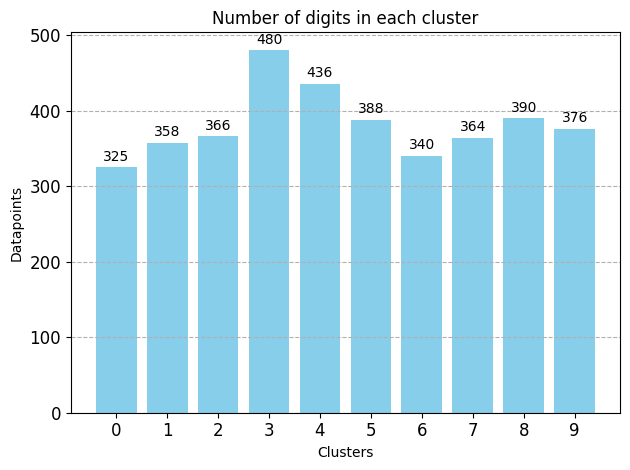

In [1766]:
clusters = kmeans.labels_
nb_elem_each_cluster(clusters)

In [1767]:
def plot_hist_of_each_cluster(res_cluster, X, Y):
    res_cluster = list(res_cluster)
    #group data points from cluster
    kmeans_data_points = {} #dict
    for c in np.unique(res_cluster):
        kmeans_data_points[c] = X.index[res_cluster == c] #index of data and assign it to cluster

    true_class = {} #dict
    for c in np.unique(res_cluster):
        #get true class from target variable for each cluster 
        true_class[c] = Y[kmeans_data_points[c]]

    for c in np.unique(res_cluster):
        plt.hist(true_class[c], color='skyblue')
        plt.xlabel("True Class")
        plt.ylabel("Datapoints")
        plt.title(f"Appearance of each class in cluster {c}")
        plt.show()

def plot_hist_of_each_cluster(res_cluster, X, Y):
    # Group data points from cluster
    kmeans_data_points = {}
    for c in np.unique(res_cluster):
        kmeans_data_points[c] = X.index[res_cluster == c]

    # Get true class for each cluster
    true_class = {}
    for c in np.unique(res_cluster):
        true_class[c] = Y[kmeans_data_points[c]]

    # Determine the number of rows and columns for subplots
    num_clusters = len(np.unique(res_cluster))
    num_cols = 4
    num_rows = (num_clusters + num_cols - 1) // num_cols  # Ceiling division

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))  # Adjust figsize as needed

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    for i, c in enumerate(np.unique(res_cluster)):
        ax = axes[i]
        n, bins, patches = ax.hist(true_class[c], color='skyblue', bins=np.arange(11)-0.5, rwidth=0.8)
        ax.set_xlabel("True Class")
        ax.set_ylabel("Datapoints")
        ax.set_title(f"Appearance of each class in cluster {c}")
        ax.set_xticks(np.arange(10))

        # Add counts on top of the bars
        for count, bin in zip(n, bins):
            if count > 0:  # Only annotate bars with a positive count
                ax.annotate(f'{int(count)}', 
                            xy=(bin + 0.25, count), 
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points", 
                            ha='center', va='bottom')

    # Hide empty subplots
    for j in range(i + 1, num_rows * num_cols):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

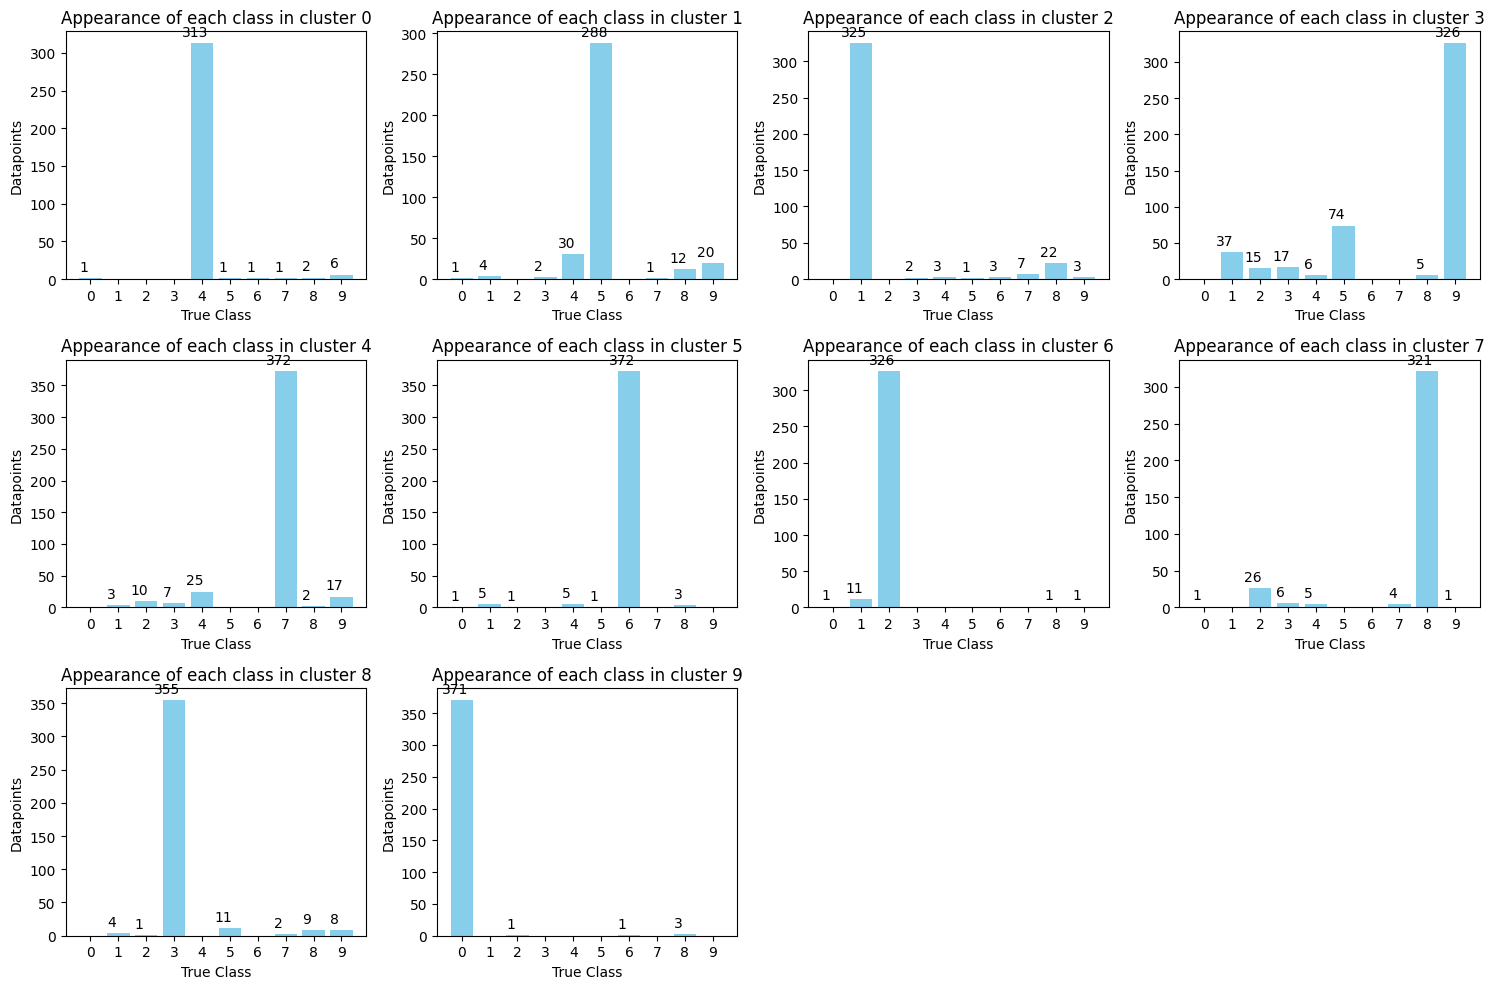

In [1768]:
plot_hist_of_each_cluster(clusters, X_train, Y_train)

In [1769]:
def visualize_digit(k_means):
    fig, ax = plt.subplots(2, 5, figsize = (8,3)) #Create a figure and a set of subplots( 2 rows and 5 columns)
    centers = k_means.cluster_centers_.reshape(np.shape(k_means.cluster_centers_)[0], 8, 8) 
    #flattened image can't be viewed, re-transform/reshape/inverse transform it to original form to view matrix shaped image
    #reshape 10 rows of clusters (k_means.cluster_centers_ = 10,64) and 64 to 8 * 8 matrix
    for axi, center in zip(ax.flat, centers): #ax.flat:flattening the image & plotting relevant centers
        axi.set(xticks = [], yticks = [])
        axi.imshow(center, interpolation='nearest',cmap = 'Blues') #imshow(matplotlib method) to render the image in notebook

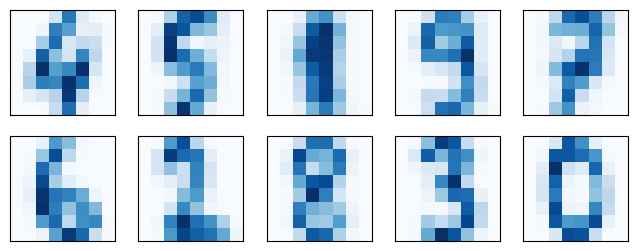

In [1770]:
visualize_digit(kmeans)

## 3. Mesurer la qualité du Clustering avec l’indice de la Silhouette

The silhouette score is a numerical value between -1 and 1 that indicates how well a data point belongs to its cluster and how separated it is from other clusters. A high silhouette score means that the data point is close to the average distance of its cluster and far from the nearest neighboring cluster, implying a good clustering. A low silhouette score means that the data point is far from the average distance of its cluster and close to another cluster, implying a poor clustering. A silhouette score of 0 means that the data point is on the border of two clusters, indicating an ambiguous clustering.

silhouette score = $\frac{(b - a)}{max(a, b)}$

In [1771]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_score(X_train, clusters) #over all quality of cluster

0.15538777962330821

silouette coefficient is small so poor cluster

In [1772]:
silhouette_samples(X_train, clusters) #quality of each data point

array([0.26381228, 0.33258729, 0.28265672, ..., 0.23163944, 0.19290818,
       0.22460561])

In [1773]:
np.sum(silhouette_samples(X_train, clusters) > 0.5)

0

amazingly bad cluster only 8 out of 3000+ data points got silouette coeff over 0.5

## 4. Faire varier K entre 10 et 20 clusters et calculer pour chaque K l’indice de la Silhouette 

In [1774]:
K = np.arange(10,21) #K in [10,20]
silhou_score_list = []
for k in K:
    kmeans = KMeans(n_clusters=k, init="k-means++").fit(X_train)
    cluster = kmeans.labels_
    silhou_score_list.append(silhouette_score(X_train, cluster))
silhou_score_list

[0.15977712850788342,
 0.1541541558653326,
 0.1530791949080771,
 0.15897785083800614,
 0.1575063456952658,
 0.13421726015076416,
 0.15241565864244705,
 0.13218142584316644,
 0.13280450383914322,
 0.13139836839846786,
 0.1291014089240613]

Best K: 10


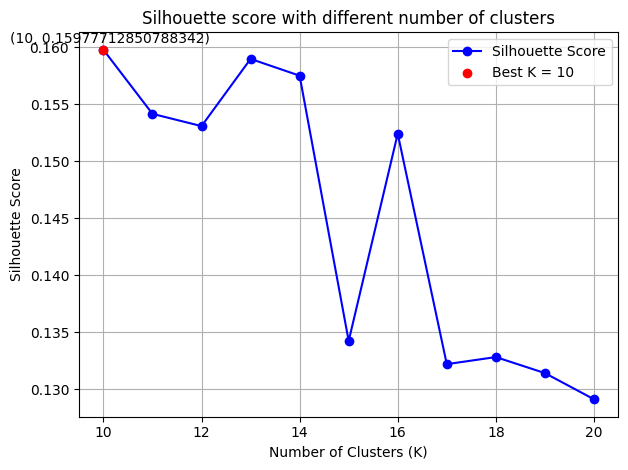

In [1775]:
# Find the best K
indx = np.argmax(silhou_score_list)
best_K = K[indx]
# best_K = K[silhou_score_list.index(max(silhou_score_list))]
print("Best K:", best_K)

plt.plot(K, silhou_score_list, marker='o', linestyle='-', color='b', label='Silhouette Score')

best_silhoutte_kmeans = np.max(silhou_score_list)

plt.scatter(best_K, max(silhou_score_list), color='r', label=f'Best K = {best_K}', zorder=5)
plt.annotate(f'({best_K}, {max(silhou_score_list)})', (best_K, max(silhou_score_list)), textcoords="offset points", xytext=(5,5), ha='center')

# Customize plot
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette score with different number of clusters')
plt.grid(True)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [1776]:
best_kmeans = fit_kmeans(X_train, nb_cluster = best_K)

Number of iterations: 16
Cluster: [9 9 4 ... 5 5 4]
Within-cluster sum of squares: 699015062.0052077


Number of iterations: 18
Cluster: [6 6 9 ... 2 2 9]
Within-cluster sum of squares: 30991765.40987598


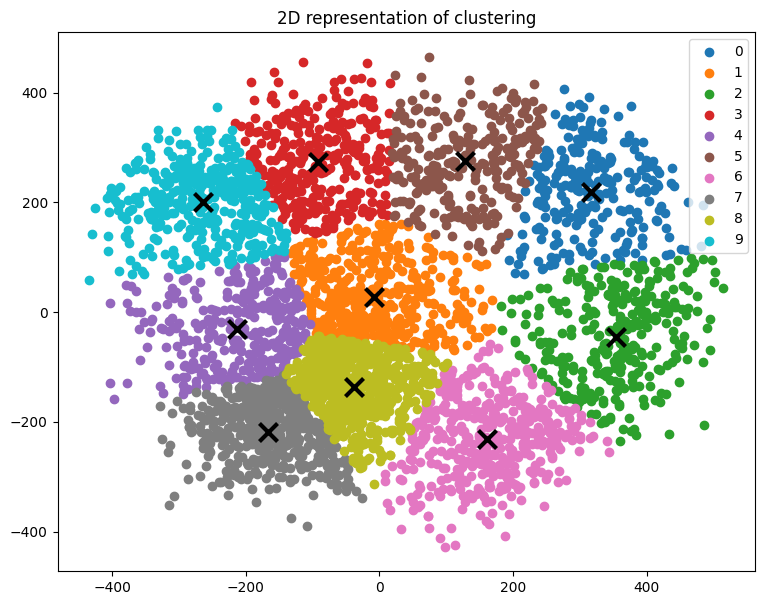

In [1777]:
visualize_data_points(X_train, best_K)

# II. Test

### 1. Par cluster: faire un vote à la majorité pour attribuer un label à chaque cluster (la classe la plus représentée dans chaque cluster)

In [1778]:
def majority_vote(clusters, X, Y):
    kmeans_data_points = {} #dict
    for c in np.unique(clusters):
        #save all datapoints kmeans grouped as class 'c'
        data_points = list(X.index[clusters == c])
        #add datapoint belongs to class c to dict 
        kmeans_data_points[c] = data_points

    true_class = {} #dict
    for c in np.unique(clusters):
        #get true class from target for each cluster 
        true_class[c] = Y[kmeans_data_points[c]]

    major_vote = {} #dict
    for c in np.unique(clusters):
        #iterate for each class c to get the most frequent class from true_class (Y_train)
        most_occur = max(list(true_class[c]), key = list(true_class[c]).count)
        #store most freq class to major_vote
        major_vote[c] = most_occur
    
    return major_vote

In [1779]:
best_clusters = best_kmeans.labels_

In [1780]:
major_vote = majority_vote(best_clusters, X_train, Y_train)
major_vote

{0: 4, 1: 5, 2: 1, 3: 9, 4: 7, 5: 6, 6: 2, 7: 8, 8: 3, 9: 0}

In [1781]:
pd.DataFrame.from_dict(major_vote, orient='index', columns=['Digit'])

,Digit
0,4
1,5
2,1
3,9
4,7
5,6
6,2
7,8
8,3
9,0


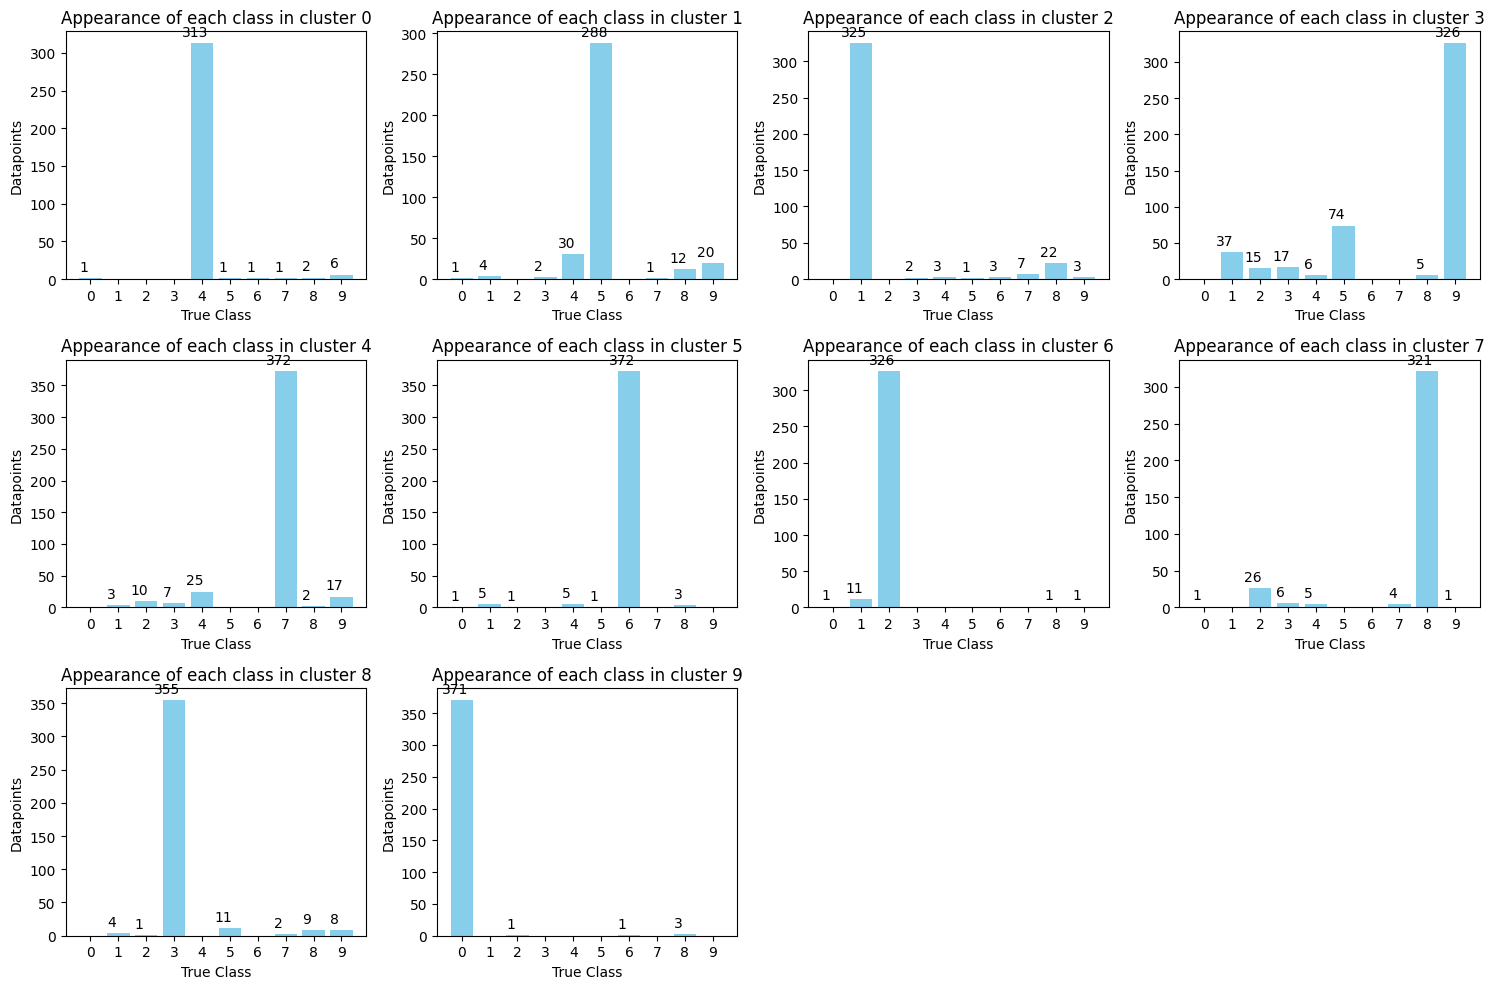

In [1782]:
plot_class_cluster_best_KMeans = plot_hist_of_each_cluster(best_clusters, X_train, Y_train)

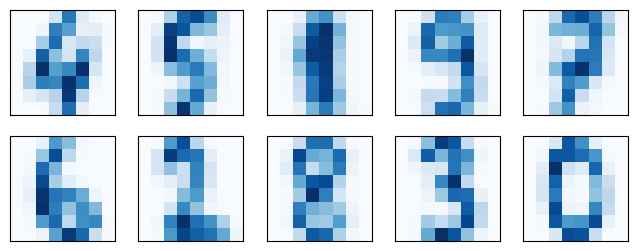

In [1783]:
visualize_digit(best_kmeans)

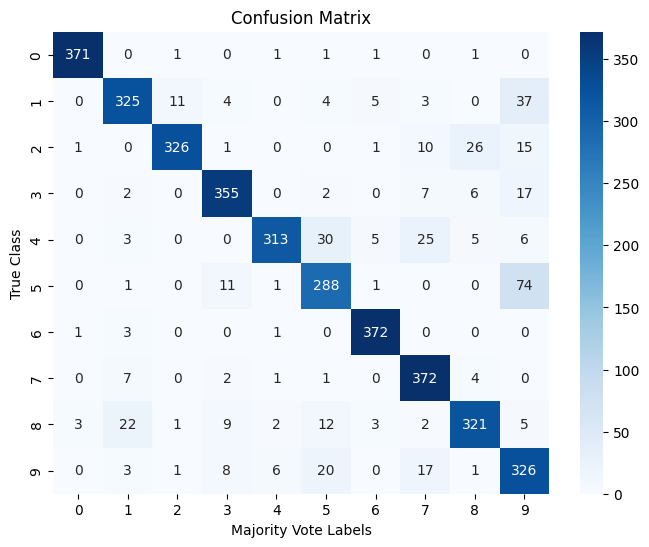

In [1784]:
from sklearn.metrics import confusion_matrix

#label the fit cluster based on major vote (change cluster to class)
majority_vote_labels = [major_vote[label] for label in list(best_clusters)]

# Create a DataFrame
df_vote = pd.DataFrame({'KMeans Labels': best_kmeans.labels_, 'Majority Vote Labels': majority_vote_labels, 'True Labels': Y_train})

# Compare Majority Vote Labels with True Labels
conf_matrix = confusion_matrix(df_vote['True Labels'], df_vote['Majority Vote Labels'])

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Majority Vote Labels')
plt.ylabel('True Class')
plt.show()

In [1785]:
df_vote

,KMeans Labels,Majority Vote Labels,True Labels
0,9,0,0
1,9,0,0
2,4,7,7
3,3,9,4
4,5,6,6
...,...,...,...
3818,3,9,9
3819,0,4,4
3820,5,6,6
3821,5,6,6


### 2. Pour chaque élément de la BT (Base de Test) :

#### Chercher le Cluster (Centre) le plus proche

In [1786]:
def distance(p1, p2):
    return np.sqrt(np.sum((p2 - p1)**2))

In [1787]:
#cluster_centers_: ndarray of shape (n_clusters, n_features)
centroids = best_kmeans.cluster_centers_
closest_clusters = []
for ele in X_test.values:
    distances = [distance(ele, center) for center in centroids]
    closest_cluster = np.argmin(distances)
    closest_clusters.append(closest_cluster)

# Print closest clusters for test data
print(closest_clusters)
my_pred = closest_clusters

[9, 2, 2, 8, 0, 3, 5, 4, 7, 3, 9, 2, 6, 8, 0, 1, 5, 4, 7, 3, 9, 2, 6, 8, 0, 1, 5, 4, 7, 3, 9, 3, 1, 1, 5, 1, 9, 3, 7, 3, 7, 0, 2, 4, 4, 8, 1, 2, 9, 9, 7, 4, 4, 7, 4, 9, 2, 2, 5, 8, 8, 4, 8, 8, 0, 5, 5, 5, 0, 7, 2, 1, 9, 3, 1, 4, 7, 4, 9, 9, 2, 4, 5, 8, 6, 2, 4, 2, 5, 8, 2, 8, 3, 2, 4, 2, 7, 0, 8, 2, 0, 9, 1, 4, 5, 3, 5, 2, 4, 1, 1, 0, 4, 6, 7, 4, 7, 1, 4, 3, 1, 2, 2, 2, 0, 3, 9, 7, 3, 2, 9, 3, 6, 8, 2, 1, 5, 4, 7, 3, 9, 2, 6, 8, 0, 1, 5, 4, 7, 3, 9, 3, 6, 8, 2, 1, 5, 4, 2, 3, 9, 3, 1, 1, 5, 1, 9, 3, 7, 3, 7, 2, 3, 4, 4, 8, 1, 3, 9, 9, 6, 6, 4, 7, 6, 9, 2, 6, 5, 8, 8, 4, 3, 8, 0, 5, 5, 5, 2, 3, 2, 1, 9, 3, 1, 6, 7, 6, 9, 9, 2, 2, 5, 8, 6, 2, 4, 8, 3, 8, 3, 2, 4, 5, 7, 2, 4, 2, 2, 9, 1, 4, 5, 3, 5, 2, 4, 1, 2, 2, 4, 6, 2, 6, 6, 1, 1, 0, 2, 2, 2, 3, 9, 7, 3, 7, 9, 2, 6, 8, 0, 3, 5, 4, 7, 1, 9, 2, 6, 8, 0, 1, 5, 4, 7, 4, 9, 2, 6, 8, 1, 1, 5, 4, 1, 3, 9, 3, 1, 1, 5, 3, 9, 3, 7, 3, 7, 0, 2, 4, 4, 8, 1, 2, 9, 9, 6, 6, 4, 7, 6, 9, 2, 6, 5, 8, 8, 4, 8, 8, 0, 5, 5, 5, 5, 4, 2, 1, 9, 4, 1, 6, 7, 

#### Attribuer à cet élément de la BT le label associé au Cluster le plus proche

List of digit: [152, 187, 167, 229, 192, 188, 168, 163, 178, 173]


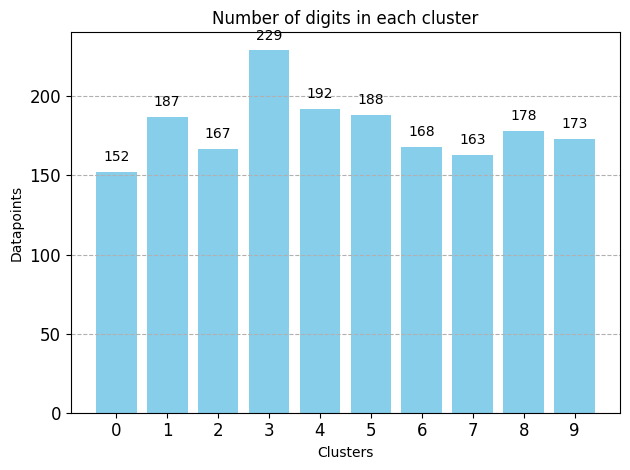

In [1788]:
nb_elem_each_cluster(closest_clusters)

List of digit: [152, 187, 167, 229, 192, 188, 168, 163, 178, 173]


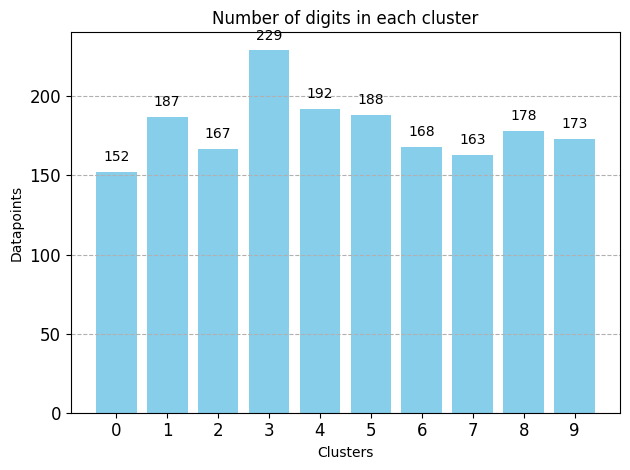

In [1789]:
#verify with function predict
pred = best_kmeans.predict(X_test)
nb_elem_each_cluster(pred)

In [1790]:
count_same_elem(pred, my_pred)

1797

In [1791]:
major_vote

{0: 4, 1: 5, 2: 1, 3: 9, 4: 7, 5: 6, 6: 2, 7: 8, 8: 3, 9: 0}

In [1792]:
# change cluster to class (majority vote)
my_pred = [major_vote[label] for label in my_pred]
pred = [major_vote[label] for label in pred]

#### Calculer la matrice de confusions (matrice 10x10) et la performance globale: analyser les confusions

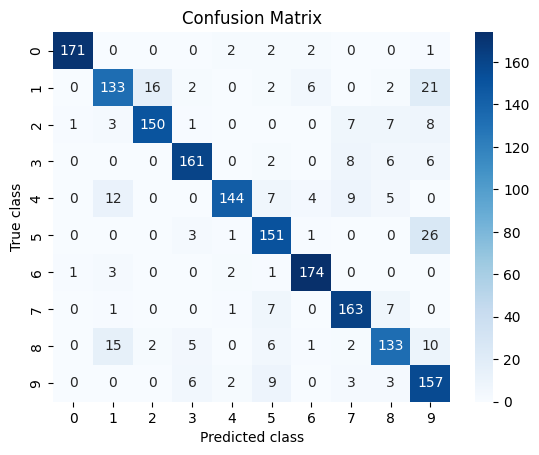

In [1793]:
matrix = confusion_matrix(Y_test, pred)

sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')

# Customize plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')

# Show plot
plt.show()

In [1794]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate overall performance metrics
accuracy = accuracy_score(Y_test, my_pred)
precision = precision_score(Y_test, my_pred, average='macro')
recall = recall_score(Y_test, my_pred, average='macro')
f1 = f1_score(Y_test, my_pred, average='macro')

# Print confusion matrix and overall performance metrics
print("----- Overall Performance -----")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


----- Overall Performance -----
Accuracy: 0.8553
Precision: 0.8613
Recall: 0.8552
F1-score: 0.8560


In [1795]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, my_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       178
           1       0.80      0.73      0.76       182
           2       0.89      0.85      0.87       177
           3       0.90      0.88      0.89       183
           4       0.95      0.80      0.86       181
           5       0.81      0.83      0.82       182
           6       0.93      0.96      0.94       181
           7       0.85      0.91      0.88       179
           8       0.82      0.76      0.79       174
           9       0.69      0.87      0.77       180

    accuracy                           0.86      1797
   macro avg       0.86      0.86      0.86      1797
weighted avg       0.86      0.86      0.86      1797

